In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Loading the data
df = pd.read_csv("C:\\Users\\govin\\OneDrive\\Desktop\\heart_attack_youth_vs_adult_nigeria.csv")
df.head()

,State,Age_Group,Gender,BMI,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Hypertension,Diabetes,Cholesterol_Level,Family_History,Stress_Level,Diet_Type,Heart_Attack_Severity,Hospitalized,Survived,Income_Level,Urban_Rural,Employment_Status
0,Ondo,Youth,Female,34.5,Non-Smoker,High,Occasionally,No,Yes,Borderline,Yes,Low,Unhealthy,Mild,No,Yes,Medium,Urban,Employed
1,FCT,Youth,Male,15.2,Non-Smoker,High,Occasionally,No,Yes,High,No,Moderate,Unhealthy,Mild,Yes,No,High,Rural,Employed
2,Borno,Youth,Female,25.0,Non-Smoker,High,Weekly,No,Yes,High,No,Moderate,Mixed,Moderate,Yes,No,Medium,Rural,Student
3,Katsina,Youth,Male,19.7,Non-Smoker,High,Occasionally,No,No,High,Yes,High,Healthy,Mild,Yes,No,Low,Rural,Unemployed
4,Kaduna,Adult,Female,35.6,Non-Smoker,Low,Rarely,No,Yes,High,Yes,High,Healthy,Moderate,No,Yes,Low,Rural,Student


In [8]:
df.columns

Index(['State', 'Age_Group', 'Gender', 'BMI', 'Smoking_Status',
       'Alcohol_Consumption', 'Exercise_Frequency', 'Hypertension', 'Diabetes',
       'Cholesterol_Level', 'Family_History', 'Stress_Level', 'Diet_Type',
       'Heart_Attack_Severity', 'Hospitalized', 'Survived', 'Income_Level',
       'Urban_Rural', 'Employment_Status'],
      dtype='object')

In [9]:
df.shape

(898796, 19)

In [10]:
#dropping unwanted columns
df = df.drop(['State','Income_Level', 'Urban_Rural', 'Employment_Status'], axis=1, errors='ignore')

In [11]:
#droping the duplicate values whether it present
df = df.drop_duplicates()

In [13]:
#checking for null values
df.isnull().sum()

Age_Group                    0
Gender                       0
BMI                          0
Smoking_Status               0
Alcohol_Consumption      75169
Exercise_Frequency           0
Hypertension                 0
Diabetes                     0
Cholesterol_Level            0
Family_History               0
Stress_Level                 0
Diet_Type                    0
Heart_Attack_Severity        0
Hospitalized                 0
Survived                     0
dtype: int64

In [14]:
#dropiing null values
df = df.dropna()
df.isnull().sum()

Age_Group                0
Gender                   0
BMI                      0
Smoking_Status           0
Alcohol_Consumption      0
Exercise_Frequency       0
Hypertension             0
Diabetes                 0
Cholesterol_Level        0
Family_History           0
Stress_Level             0
Diet_Type                0
Heart_Attack_Severity    0
Hospitalized             0
Survived                 0
dtype: int64

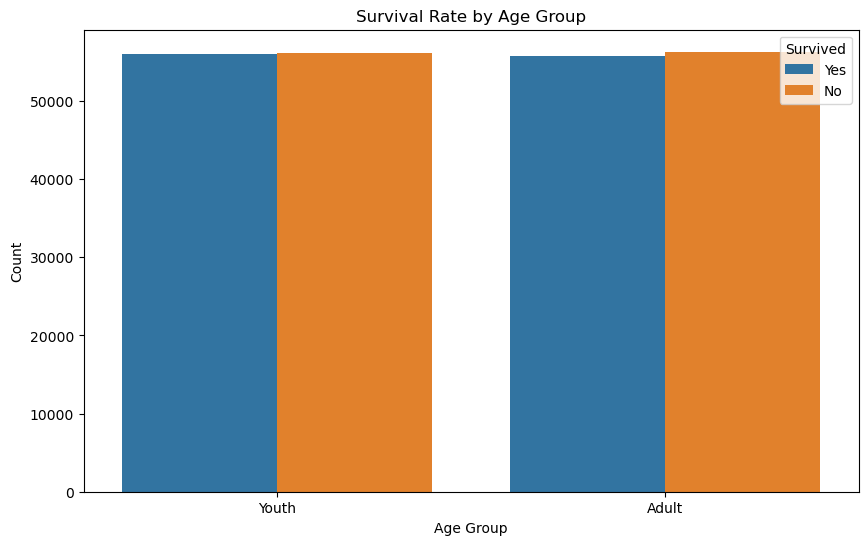

In [21]:
#Survival Rate by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')

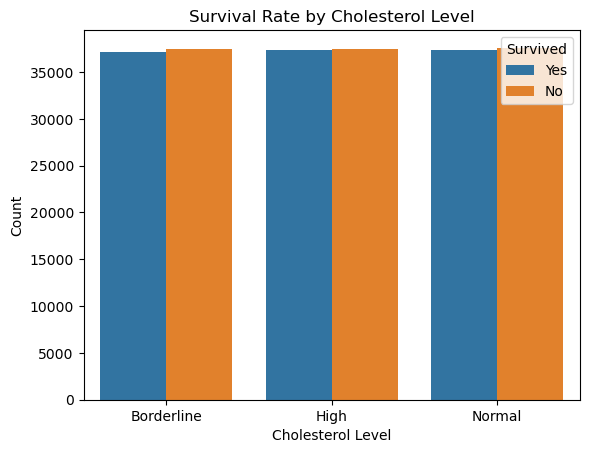

In [24]:
#Survival Rate by Cholesterol Levelplt.figure(figsize=(10, 6))
sns.countplot(x='Cholesterol_Level', hue='Survived', data=df)
plt.title('Survival Rate by Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

In [25]:
#selecting categorical columns
categorical_cols = ['Age_Group', 'Gender', 'Smoking_Status', 'Alcohol_Consumption', 'Exercise_Frequency', 
                    'Hypertension', 'Diabetes', 'Cholesterol_Level', 'Family_History', 'Stress_Level', 
                    'Diet_Type', 'Heart_Attack_Severity', 'Hospitalized', 'Survived']

In [26]:
#performing label encoding in categorical columns
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to handle NaN or mixed types
    encoders[col] = le
#displaying preprocesssed data
df.head(10)

,Age_Group,Gender,BMI,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Hypertension,Diabetes,Cholesterol_Level,Family_History,Stress_Level,Diet_Type,Heart_Attack_Severity,Hospitalized,Survived
0,1,0,34.5,0,0,1,0,1,0,1,1,2,0,0,1
1,1,1,15.2,0,0,1,0,1,1,0,2,2,0,1,0
2,1,0,25.0,0,0,3,0,1,1,0,2,1,1,1,0
3,1,1,19.7,0,0,1,0,0,1,1,0,0,0,1,0
4,0,0,35.6,0,1,2,0,1,1,1,0,0,1,0,1
6,1,0,23.2,1,2,0,1,0,2,1,1,0,2,1,0
8,1,1,20.4,1,2,3,0,0,2,1,1,0,1,1,1
9,0,1,30.2,1,2,3,0,0,2,0,1,2,2,0,1
10,1,1,22.1,1,2,2,0,0,0,1,1,2,0,1,0
11,1,1,32.1,1,1,0,1,0,0,0,1,0,1,1,0


In [28]:
#shape of preprocessed data
df.shape

(224321, 15)

In [29]:
df.describe()

,Age_Group,Gender,BMI,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Hypertension,Diabetes,Cholesterol_Level,Family_History,Stress_Level,Diet_Type,Heart_Attack_Severity,Hospitalized,Survived
count,224321.000000,224321.000000,224321.000000,224321.000000,224321.000000,224321.000000,224321.000000,224321.000000,224321.000000,224321.000000,224321.000000,224321.000000,224321.000000,224321.000000,224321.000000
mean,0.500221,0.499895,27.491382,0.500292,1.003094,1.497198,0.498825,0.500876,1.001846,0.501362,1.001070,0.998881,1.000004,0.500622,0.498558
std,0.500001,0.500001,7.223357,0.500001,0.816128,1.119135,0.500000,0.500000,0.816302,0.499999,0.816003,0.817583,0.816781,0.500001,0.499999
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,21.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,27.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,33.700000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,1.000000,1.000000,40.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000


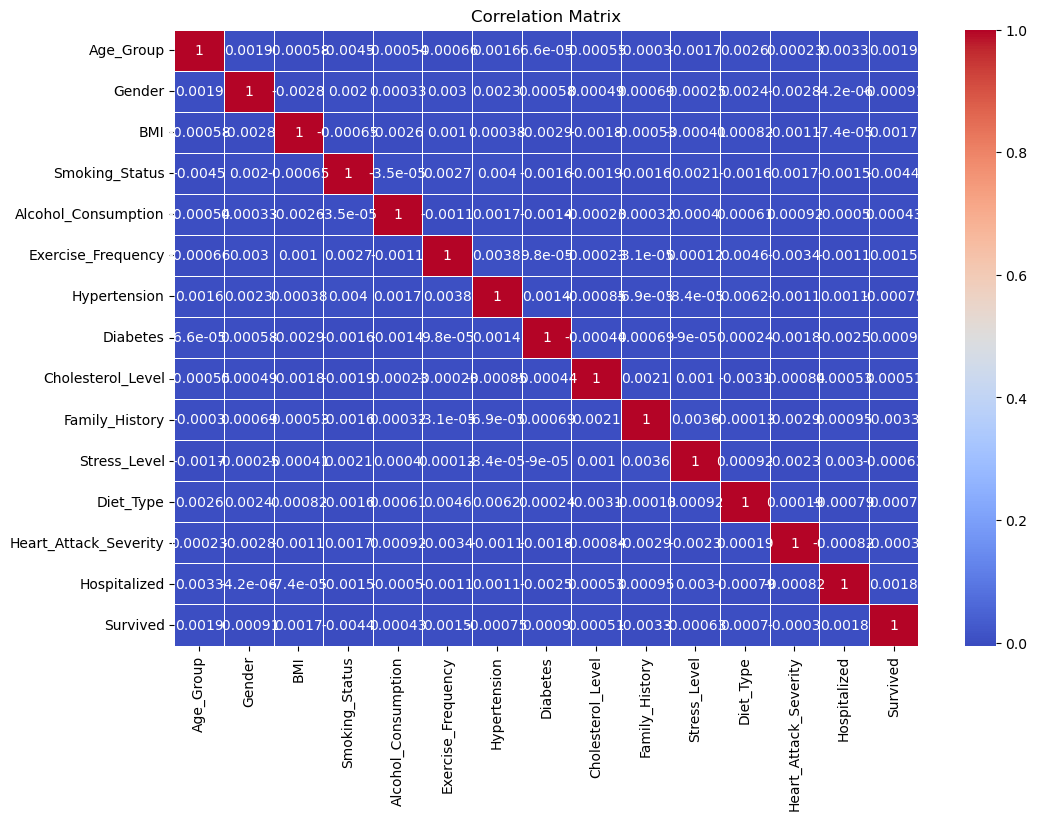

In [31]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [32]:
#info of preprocessed data
new_df = df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224321 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age_Group              224321 non-null  int32  
 1   Gender                 224321 non-null  int32  
 2   BMI                    224321 non-null  float64
 3   Smoking_Status         224321 non-null  int32  
 4   Alcohol_Consumption    224321 non-null  int32  
 5   Exercise_Frequency     224321 non-null  int32  
 6   Hypertension           224321 non-null  int32  
 7   Diabetes               224321 non-null  int32  
 8   Cholesterol_Level      224321 non-null  int32  
 9   Family_History         224321 non-null  int32  
 10  Stress_Level           224321 non-null  int32  
 11  Diet_Type              224321 non-null  int32  
 12  Heart_Attack_Severity  224321 non-null  int32  
 13  Hospitalized           224321 non-null  int32  
 14  Survived               224321 non-null  i

In [33]:
new_df

,Age_Group,Gender,BMI,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Hypertension,Diabetes,Cholesterol_Level,Family_History,Stress_Level,Diet_Type,Heart_Attack_Severity,Hospitalized,Survived
0,1,0,34.5,0,0,1,0,1,0,1,1,2,0,0,1
1,1,1,15.2,0,0,1,0,1,1,0,2,2,0,1,0
2,1,0,25.0,0,0,3,0,1,1,0,2,1,1,1,0
3,1,1,19.7,0,0,1,0,0,1,1,0,0,0,1,0
4,0,0,35.6,0,1,2,0,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299994,1,0,21.4,1,2,0,0,0,1,1,1,1,1,1,1
299995,1,1,24.1,1,1,3,0,1,1,0,1,0,1,0,0
299997,0,1,26.4,0,2,1,0,0,2,1,0,1,2,1,0
299998,1,1,31.0,1,1,0,0,1,0,1,2,0,1,0,1
